## Подготовка питона

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [2]:
def getDataFromCSV(file_name, x, y):
    with open(file_name, 'r') as file:
        file.readline()

        for line in file:
            print(line)
            values = line.split(',')
            x.append(float(values[0]))
            y.append(float(values[1]))

In [3]:
def mnk(x : np.array, y : np.array):
    mean_x   = np.mean(x)
    mean_y   = np.mean(y)
    mean_xy  = np.mean(x * y)
    mean_xsq = np.mean(x * x)
    mean_ysq = np.mean(y * y)

    print('x:   ', mean_x)
    print('y:   ', mean_y)
    print('xy:  ', mean_xy)
    print('x^2: ', mean_xsq)
    print('y^2: ', mean_ysq)


    k = (mean_xy - mean_x * mean_y) / (mean_xsq - mean_x ** 2)
    b = mean_y - k*mean_x

    print('k =', k)
    print('b =', b)

    delta_k = 1 / np.sqrt(len(x)) * np.sqrt((mean_ysq - mean_y**2)/(mean_xsq - mean_x**2) - k*k)
    print('delta_k = ', delta_k)

    delta_b = delta_k * np.sqrt(mean_xsq - mean_x ** 2)
    print('delta_b = ', delta_b)

    print('\n')

    n = len(x)

    return [k, b]

def plot_linear(x : np.array, y : np.array, col_index : int, label):
    color = plt.cm.tab10(col_index)

    coeffs = mnk(x, y)
    plt.plot(x, y, 'o', color = color)

    x = np.linspace(min(x), max(x), 3)
    plt.plot(x, coeffs[0] * x + coeffs[1], color = color, label=label)

# Лаба 3.2.4-3.2.5

In [4]:
# 100 мГн на протяжении всей лабы
L = 100e-3

# 1 нФ - нулевая емкость
C_0 = 1.1e-9

### 1. График периодов

[ 65.89860345  91.05200545 110.62689301 127.22480583 141.89430213
 155.18322957 167.42065732 178.82258878 189.53986393 199.68275284]
x:    142.73457023199808
y:    143.18
xy:   22172.12267024839
x^2:  22107.913858440166
y^2:  22236.699999999993
k = 1.000363500796614
b = 0.3935456380182245
delta_k =  0.0031293434142589667
delta_b =  0.13033842368583634




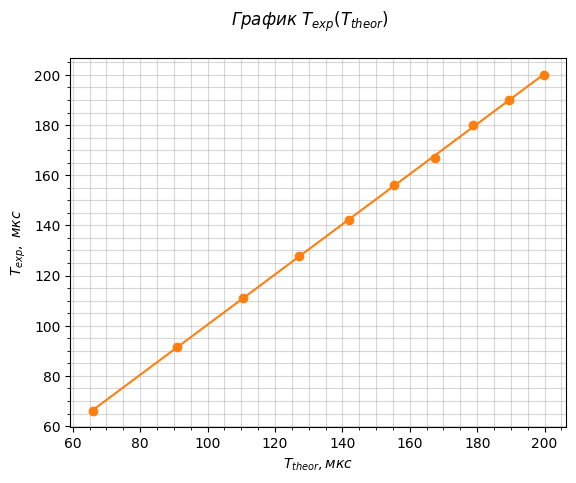

In [5]:
# В мкФ
C = np.array([0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009]) * 1e-6

# В мкс
T_exp = np.array([66.2, 91.6, 111, 128, 142, 156, 167, 180, 190, 200]) * 1e-6

T_theor = 2 * np.pi * np.sqrt(L * (C + C_0))
print(T_theor * 1e6)


plot_linear(T_theor * 1e6, T_exp * 1e6, 1, '')

plt.suptitle('$ График\\  T_{exp}(T_{theor}) $')
plt.xlabel('$ T_{theor}, мкс $')
plt.ylabel('$ T_{exp},\\ мкс $')

plt.grid(True, which='both', alpha=0.5)
plt.minorticks_on()

# plt.legend()
plt.show()



### 2, 3. Декременты

x:    1.6075172755569563e-06
y:    1.8401549928167107
xy:   7.046642901439579e-06
x^2:  6.305262102088142e-12
y^2:  7.884576834100358
k = 1098736.0410668126
b = 0.07391782552475212
delta_k =  18189.786594724552
delta_b =  0.035088613718846695




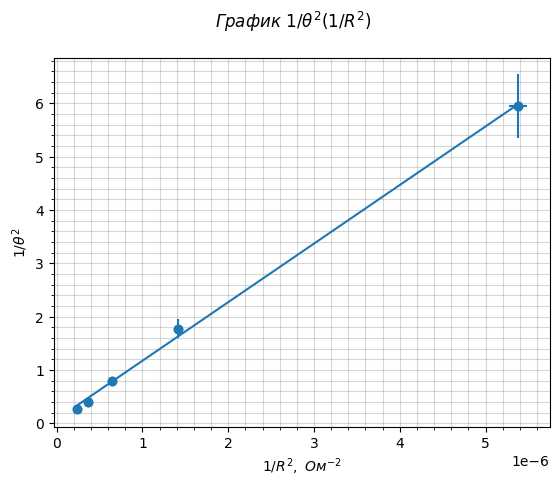

In [6]:
R_L = 23.0 # в Омах


R = np.array([408.25, 816.5, 1224.75, 1633.0, 2041.25])
# R = np.array([1000, 1300, 1700, 2000])

Theta = np.array([0.41, 0.75, 1.12, 1.57, 1.92])
# Theta = np.array([0.816, 0.999, 1.316, 1.427])

plot_linear(1 / (R + R_L) ** 2, 1 / (Theta ** 2), 0, '')

xerr = 1 / (R + R_L) ** 2 * 0.02
yerr = 1 / (Theta ** 2) * 0.10
plt.errorbar(1 / (R + R_L) ** 2, 1 / (Theta ** 2), xerr=xerr, yerr=yerr, fmt='o')

plt.suptitle('$ График\\  1 / \\theta^2(1 / R^2) $')
plt.xlabel('$ 1 / R^2,\\ Ом^{-2} $')
plt.ylabel('$ 1 / \\theta^2 $')

plt.grid(True, which='both', alpha=0.5)
plt.minorticks_on()
# plt.legend()
plt.show()


In [7]:
k = 1456434.9644819975
delta_k =  56104.32662204089

R_cr = 2 * np.pi * np.sqrt(k)
delta_R_cr = R_cr * delta_k / k * 1/2
print(f"R_cr = {R_cr} +- {delta_R_cr}")

R_cr = 7582.726933063579 +- 146.04970318384716


### 7. АЧХ резонанса

In [8]:
def lorenz_func(x, a, b, c, d):
  return a / np.sqrt(b + (c * x - d / x)**2)

C:\Users\Мария\AppData\Local\Temp\ipykernel_23028\522569269.py:2: RuntimeWarning: invalid value encountered in sqrt
  return a / np.sqrt(b + (c * x - d / x)**2)


NameError: name 'x1' is not defined

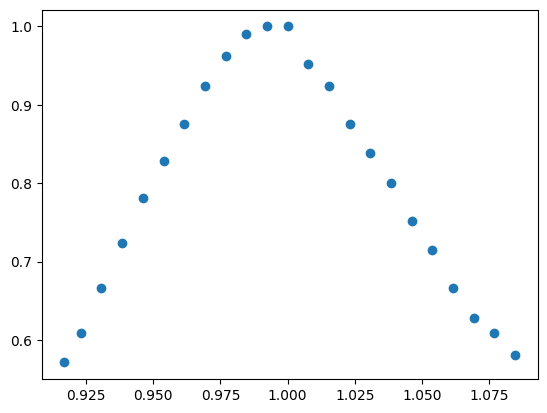

In [9]:
# Первый набор данных
f1 = np.array([0.9169230769,0.9230769231,0.9307692308,0.9384615385,0.9461538462,
                0.9538461538,0.9615384615,0.9692307692,0.9769230769,0.9846153846,
                0.9923076923,1,1.007692308,1.015384615,1.023076923,1.030769231,
                1.038461538,1.046153846,1.053846154,1.061538462,1.069230769,
                1.076923077,1.084615385])
U1 = np.array([0.5714285714,0.6095238095,0.6666666667,0.7238095238,0.780952381,
               0.8285714286,0.8761904762,0.9238095238,0.9619047619,0.9904761905,
               1,1,0.9523809524,0.9238095238,0.8761904762,0.8380952381,0.8,
               0.7523809524,0.7142857143,0.6666666667,0.6285714286,0.6095238095,
               0.58095238])
phi1 = np.array([2.91, 2.73, 2.68, 2.43, 2.40, 2.32, 2.17, 1.98, 1.85, 1.68, 1.42, 1.27, 1.19, 0.99, 0.90, 0.79, 0.68, 0.60, 0.50, 0.46, 0.43, 0.34])

# Второй набор данных
f2 = np.array([0.8769230769,0.8892307692,0.9015384615,0.9138461538,0.9261538462,
                0.9384615385,0.9507692308,0.9630769231,0.9753846154,0.9876923077,
                1,1.012307692,1.024615385,1.036923077,1.049230769,1.061538462,
                1.073846154,1.086153846,1.098461538,1.110769231,1.123076923])
U2 = np.array([0.6315789474,0.649122807,0.701754386,0.7543859649,0.8070175439,
               0.8421052632,0.8947368421,0.9473684211,0.9824561404,1,
               1,1,0.9649122807,0.9473684211,0.9122807018,0.8771929825,
               0.8421052632,0.8245614035,0.7719298246,0.7368421053,0.701754386])
phi2 = np.array([0.68, 0.74, 0.77, 0.86, 0.93, 1.00, 1.09, 1.17, 1.29, 1.38, 1.45, 1.52, 1.67, 1.77, 1.85, 1.96, 1.33, 1.23, 1.11, 1.06, 0.96])

# Третий набор
f3 = np.array([0.8615384615,0.9230769231,0.9538461538,0.9846153846,1.015384615,
                1.046153846,1.076923077,1.107692308,1.138461538,1.169230769,
                1.230769231])
U3 = np.array([0.6962025316,0.8734177215,0.9367088608,0.9746835443,1,
               1,0.9873417722,0.9620253165,0.9367088608,0.9335443038,0.835443038])

# x1 = np.linspace(0.8, 1.2, 1000)

plt.plot(f1, U1 / max(U1) , 'o', color = plt.cm.tab10(0), label = '$ R = R_1 = 408\\ Ом $')
par, _ = curve_fit(f=lorenz_func, xdata=f1, ydata=U1)
plt.plot(x1, lorenz_func(x1, *par), color=plt.cm.tab10(0))

# plt.plot(f2, U2 / max(U2), 'o', color = plt.cm.tab10(1), label = '$ R = R_2 = 816\\ Ом $')
# par, _ = curve_fit(f=lorenz_func, xdata=f2, ydata=U2)
# plt.plot(x1, lorenz_func(x1, *par), color=plt.cm.tab10(1))

plt.plot(f3, U3, 'o', color = plt.cm.tab10(2), label = '$ R = R_2 = 1632\\ Ом $')
par, _ = curve_fit(f=lorenz_func, xdata=f3, ydata=U3)
plt.plot(x1, lorenz_func(x1, *par), color=plt.cm.tab10(2))

# plt.plot(x1, 0.707 + 0 * x1, color='black', label=r'$U/U_0 = 1 / \sqrt{2}$', linestyle='--')

plt.suptitle('АЧХ')
plt.xlabel('$ f\\ /\\ f_0 $')
plt.ylabel('$ U\\ /\\ U_0 $')

plt.grid(True, which='both', alpha=0.5)
plt.minorticks_on()

plt.legend()
plt.show()

### 10. ФЧХ резонанса

In [ ]:
def fchh(x, a, s, r):
  return np.atan(a * (x - s)) / np.pi + r

[16.97150836  0.99417247 -0.4710346 ]
[ 4.48336607  0.98065359 -0.40211071]


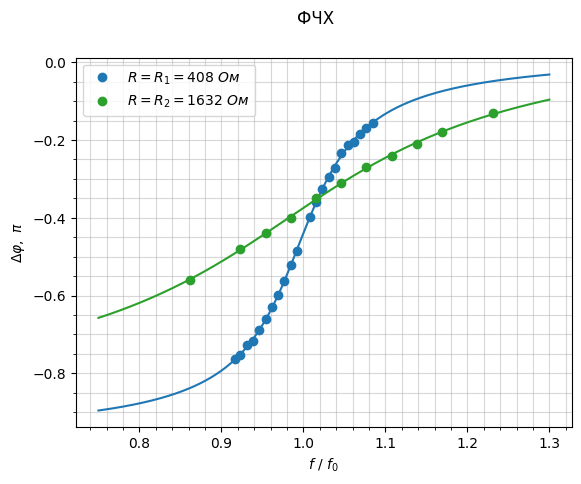

In [ ]:
# Первый набор данных
f1 = np.array([0.9169230769,0.9230769231,0.9307692308,0.9384615385,0.9461538462,
                0.9538461538,0.9615384615,0.9692307692,0.9769230769,0.9846153846,
                0.9923076923,1.007692308,1.015384615,1.023076923,1.030769231,
                1.038461538,1.046153846,1.053846154,1.061538462,1.069230769,
                1.076923077,1.084615385])
phi1 = -np.array([2.396658204, 2.367504224, 2.284597594, 2.253652906, 2.16392902, 2.072445842,
                  1.979203372, 1.88420161, 1.76350162, 1.640665347, 1.523798101,
                  1.246992372, 1.127957426, 1.027866284, 0.9261415143, 0.8524711666, 0.7348813535,
                  0.6714211819, 0.6416388836, 0.5807862339, 0.5277875658, 0.4872610206])
phi1 = phi1 / np.pi


# Второй набор данных
f2 = np.array([0.8769230769,0.8892307692,0.9015384615,0.9138461538,0.9261538462,
                0.9384615385,0.9507692308,0.9630769231,0.9753846154,0.9876923077,
                1,1.012307692,1.024615385,1.036923077,1.049230769,1.061538462,
                1.073846154,1.086153846,1.098461538,1.110769231,1.123076923])
phi2 = -np.array([0.68, 0.74, 0.77, 0.86, 0.93, 1.00, 1.09, 1.17, 1.29, 1.38, 1.45, 1.52, 1.67, 1.77, 1.85, 1.96, 1.33, 1.23, 1.11, 1.06, 0.96])

# Третий набор
f3 = np.array([0.8615384615,0.9230769231,0.9538461538,0.9846153846,1.015384615,
                1.046153846,1.076923077,1.107692308,1.138461538,1.169230769,
                1.230769231])
phi3 = -np.array([0.56, 0.48, 0.44, 0.40, 0.35, 0.31, 0.27, 0.24, 0.21, 0.18, 0.13])

x2 = np.linspace(0.75, 1.3, 1000)

plt.plot(f1, phi1, 'o', color=plt.cm.tab10(0), label = '$ R = R_1 = 408\\ Ом $')
par, _ = curve_fit(f=fchh, xdata=f1, ydata=phi1)
print(par)
plt.plot(x2, fchh(x2, *par), color=plt.cm.tab10(0))

# plt.plot(f2, phi2 / np.pi, 'o', color=plt.cm.tab10(1), label = '$ R = R_2 = 816\\ Ом $')
# par, _ = curve_fit(f=fchh, xdata=f2, ydata=phi2 / np.pi)
# plt.plot(x2, fchh(x2, *par), color=plt.cm.tab10(1))
# #
plt.plot(f3, phi3, 'o', color=plt.cm.tab10(2), label = '$ R = R_2 = 1632\\ Ом $')
par, _ = curve_fit(f=fchh, xdata=f3, ydata=phi3)
print(par)
plt.plot(x2, fchh(x2, *par), color=plt.cm.tab10(2))

# plt.plot(x2, -0.25 + 0 * x2, color='black', label=r'$\Delta\phi =-0.25$', linestyle='--')
# plt.plot(x2, -0.75 + 0 * x2, color='black', label=r'$\Delta\phi =-0.75$', linestyle='--')

plt.suptitle('ФЧХ')
plt.xlabel(r'$ f\ /\ f_0 $')
plt.ylabel(r'$ \Delta\varphi,\ \pi $')

# plt.grid()
plt.grid(True, which='both', alpha=0.5)
plt.minorticks_on()  # включаем дополнительные деления

plt.legend()
plt.show()

# лаба 3.3.1

In [ ]:
data = {
    "U1": 70,
    "ia1": [63, 63, 57, 55.2, 48.6, 42, 21, 3, 1.5, 0.6],
    "ic1": [0, 60, 100, 120, 140, 160, 180, 200, 220, 240],

    "U2": 80,
    "ia2": [61.8, 61.8, 59.4, 55.2, 53.4, 46.2, 38.4, 12.6, 2.4, 1.2],
    "ic2": [0, 60, 100, 120, 140, 160, 180, 200, 220, 240],

    "U3": 90,
    "ia3": [63, 63, 62.4, 57.6, 57.6, 52.2, 45.6, 32.4, 6, 2.4],
    "ic3": [0, 60, 100, 120, 140, 160, 180, 200, 220, 240],

    "U4": 100,
    "ia4": [81, 81.6, 79.8, 75, 71.4, 66.6, 61.2, 51.6, 23.4, 12.6, 8.4, 6.3, 5.1, 4.2, 3.3, 2.7, 2.4, 2.1, 1.8, 0.9, 0.6],
    "ic4": [0, 60, 100, 120, 140, 160, 180, 200, 220, 224, 228, 232, 236, 240, 244, 248, 252, 256, 260, 280, 300],

    "U5": 110,
    "ia5": [81, 76.2, 75, 72, 73.8, 70.8, 72, 65.4, 58.2, 48, 43.8, 32.4, 22.8, 17.4, 10.8, 7.8, 5.4, 4.5, 3.9, 3.3, 1.8, 1.2],
    "ic5": [0, 60, 80, 100, 120, 140, 160, 180, 200, 220, 224, 228, 232, 236, 240, 244, 248, 252, 256, 260, 280, 300],

    "U6": 120,
    "ia6": [78, 75.6, 75, 76.8, 78, 75, 70.8, 68.4, 63.6, 57.6, 55.2, 52.8, 48.6, 44.4, 37.8, 28.8, 19.2, 13.8, 9, 6, 2.4, 1.8],
    "ic6": [0, 60, 80, 100, 120, 140, 160, 180, 200, 220, 224, 228, 232, 236, 240, 244, 248, 252, 256, 260, 280, 300],
}

k = 28e-3


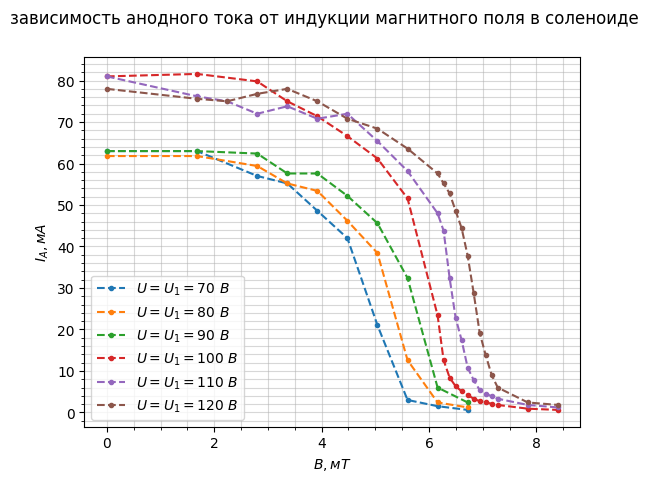

In [ ]:
ia1 = np.array(data["ia1"])
ic1 = np.array(data["ic1"])
ia2 = np.array(data["ia2"])
ic2 = np.array(data["ic2"])
ia3 = np.array(data["ia3"])
ic3 = np.array(data["ic3"])
ia4 = np.array(data["ia4"])
ic4 = np.array(data["ic4"])
ia5 = np.array(data["ia5"])
ic5 = np.array(data["ic5"])
ia6 = np.array(data["ia6"])
ic6 = np.array(data["ic6"])

plt.plot(ic1 * k, ia1, 'o', markersize = 3, linestyle = 'dashed', color=plt.cm.tab10(0), label = '$ U = U_1 = 70\\ В $')
plt.plot(ic2 * k, ia2, 'o', markersize = 3, linestyle = 'dashed', color=plt.cm.tab10(1), label = '$ U = U_1 = 80\\ В $')
plt.plot(ic3 * k, ia3, 'o', markersize = 3, linestyle = 'dashed', color=plt.cm.tab10(2), label = '$ U = U_1 = 90\\ В $')
plt.plot(ic4 * k, ia4, 'o', markersize = 3, linestyle = 'dashed', color=plt.cm.tab10(3), label = '$ U = U_1 = 100\\ В $')
plt.plot(ic5 * k, ia5, 'o', markersize = 3, linestyle = 'dashed', color=plt.cm.tab10(4), label = '$ U = U_1 = 110\\ В $')
plt.plot(ic6 * k, ia6, 'o', markersize = 3, linestyle = 'dashed', color=plt.cm.tab10(5), label = '$ U = U_1 = 120\\ В $')
plt.suptitle('зависимость анодного тока от индукции магнитного поля в соленоиде')
plt.ylabel(r'$ I_A, мA $')
plt.xlabel(r'$ B, мТ $')

# plt.grid()
plt.grid(True, which='both', alpha=0.5)
plt.minorticks_on()  # включаем дополнительные деления

plt.legend()
plt.show()

In [ ]:
Kmax = [0] * 7

Kmax = [
    -max(-
        (data[f"ia{i}"][j] - data[f"ia{i}"][j - 1]) /
        (data[f"ic{i}"][j] - data[f"ic{i}"][j - 1])
        for j in range(len(data[f"ia{i}"]))
    )
    for i in range(1, 7)
]

Bcr = [
    data[f"ic{i}"][j] * k
    for i in range(1, 7)
    for j in range(1, len(data[f"ia{i}"]))
    if (data[f"ia{i}"][j] - data[f"ia{i}"][j-1]) / (data[f"ic{i}"][j] - data[f"ic{i}"][j-1]) == Kmax[i-1]
]


print(Kmax, Bcr, sep = "\n")

[-1.05, -1.2899999999999998, -1.3199999999999998, -2.6999999999999997, -2.8499999999999996, -2.4000000000000004]
[5.04, 5.6000000000000005, 6.16, 6.272, 6.384, 6.944]


In [ ]:
Bcr_sq = [Bcr[i] ** 2 for i in range(len(Bcr))]
print(Bcr_sq)

[25.401600000000002, 31.360000000000007, 37.9456, 39.337984000000006, 40.755456, 48.219136]


In [ ]:
def plot_linear(x, y, scale=1, label=''):
    plt.plot(x, np.array(y)*scale, 'o-', label=label)


Наклон: 0.41047552000000015
Смещение: -1.825211733333342
Ковариационная матрица:
 [[ 2.51916896e-03 -2.39321051e-01]
 [-2.39321051e-01  2.34702575e+01]]
Ошибка наклона: 0.0501913235267983
Ошибка смещения: 4.844611176642216


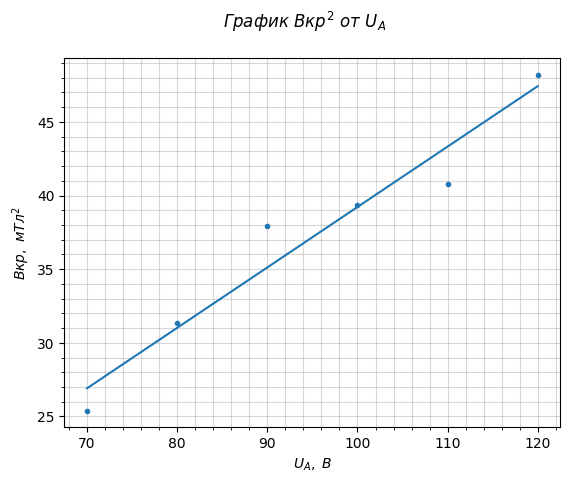

In [ ]:
ua = np.array([70, 80, 90, 100, 110, 120])

plt.plot(ua, Bcr_sq, 'o', markersize = 3, color=plt.cm.tab10(0))

coeffs, cov = np.polyfit(ua, Bcr_sq, 1, cov = True)
a, b = coeffs
print("Наклон:", a)
print("Смещение:", b)
print("Ковариационная матрица:\n", cov)

# Стандартные ошибки коэффициентов
errors = np.sqrt(np.diag(cov))
print("Ошибка наклона:", errors[0])
print("Ошибка смещения:", errors[1])

plt.plot(ua, a*ua + b, '-', label=f'Аппроксимация y={a:.2f}x+{b:.2f}')

plt.suptitle('$ График\\  Bкр^2 \\ от \\ U_A $')
plt.xlabel('$ U_A, \\ B $')
plt.ylabel('$ Bкр, \\ мТл^2 $')

plt.grid(True, which='both', alpha=0.5)
plt.minorticks_on()

# plt.legend()
plt.show()


Наклон: 0.0022842902715142855
Смещение: 4.292929220000393e-05
Ковариационная матрица:
 [[ 2.99520762e-09 -1.04832267e-08]
 [-1.04832267e-08  4.54273155e-08]]
Ошибка наклона: 5.4728490003311664e-05
Ошибка смещения: 0.00021313684697938208


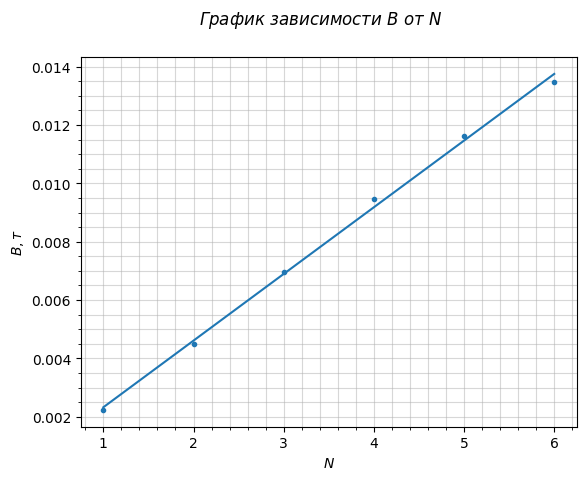

In [ ]:
B = np.array([0.002236842105, 0.004507575758, 0.006947767145, 0.009455741627, 0.01162480064, 0.01345494418])
N = np.array([1, 2, 3, 4, 5, 6])

plt.plot(N, B, 'o', markersize = 3, color=plt.cm.tab10(0))

coeffs, cov = np.polyfit(N, B, 1, cov=True)  # degree=1, cov=True
a, b = coeffs

print("Наклон:", a)
print("Смещение:", b)
print("Ковариационная матрица:\n", cov)

# Стандартные ошибки коэффициентов
errors = np.sqrt(np.diag(cov))
print("Ошибка наклона:", errors[0])
print("Ошибка смещения:", errors[1])

plt.plot(N, a*N + b, '-', label=f'Аппроксимация y={a:.2f}x+{b:.2f}')

plt.suptitle('$ График\\ зависимости \\ B \\ от \\ N $')
plt.xlabel('$ N $')
plt.ylabel('$ B, т $')

plt.grid(True, which='both', alpha=0.5)
plt.minorticks_on()

# plt.legend()
plt.show()